In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import transforms


train_dataset = datasets.MNIST(
    root = "../data/MNIST",
    train = True,
    download = True,
    transform = transforms.ToTensor())

test_dataset = datasets.MNIST(
    root = "../data/MNIST",
    train = False,
    transform = transforms.ToTensor())

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
import random
random.seed(42)
torch.manual_seed(42)
if device == "cuda":
    torch.cuda.manual_seed_all(42)

In [4]:
print('number of training data : ', len(train_dataset))
print('number of test data : ', len(test_dataset))

number of training data :  60000
number of test data :  10000


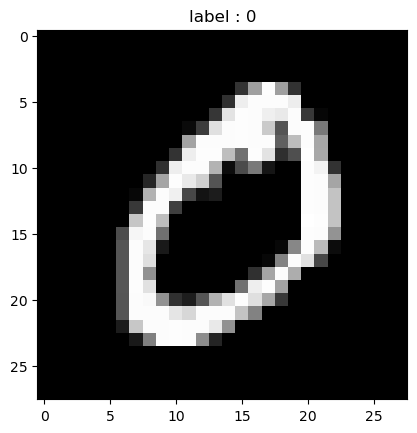

In [5]:
from matplotlib import pyplot as plt

image, label = train_dataset[1]
plt.imshow(image.squeeze(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [7]:
from torch import nn

class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sotfmax_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU(),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        outputs = self.linear_sotfmax_stack(x)
        return outputs
        

In [8]:
model = Perceptron().to(device)
print(model)

Perceptron(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sotfmax_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [9]:
# Install the torchsummary package
%pip install torchsummary

from torchsummary import summary
summary(model, (1, 28, 28))

Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
            Linear-6                   [-1, 10]             650
              ReLU-7                   [-1, 10]               0
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.42
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [11]:
def train_loop():
    model.train()
    for X, y in train_dataloader:
        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    print(loss.item())


from  tqdm import tqdm
epochs = 100
for i in tqdm(range(epochs)):
    print(f"Epoch {i+1} \n------------------")
    train_loop()      

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 
------------------


  1%|          | 1/100 [00:02<04:16,  2.59s/it]

2.2926065921783447
Epoch 2 
------------------


  2%|▏         | 2/100 [00:05<04:19,  2.65s/it]

2.2975542545318604
Epoch 3 
------------------


  3%|▎         | 3/100 [00:08<04:27,  2.76s/it]

2.295574426651001
Epoch 4 
------------------


  4%|▍         | 4/100 [00:11<04:35,  2.87s/it]

2.284250020980835
Epoch 5 
------------------


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

2.272146463394165
Epoch 6 
------------------


  6%|▌         | 6/100 [00:17<04:40,  2.98s/it]

2.267954111099243
Epoch 7 
------------------


  7%|▋         | 7/100 [00:20<04:39,  3.01s/it]

2.2639992237091064
Epoch 8 
------------------


  8%|▊         | 8/100 [00:23<04:39,  3.04s/it]

2.2242608070373535
Epoch 9 
------------------


  9%|▉         | 9/100 [00:26<04:40,  3.08s/it]

2.220346212387085
Epoch 10 
------------------


 10%|█         | 10/100 [00:29<04:37,  3.08s/it]

2.1695234775543213
Epoch 11 
------------------


 11%|█         | 11/100 [00:32<04:32,  3.06s/it]

2.1784677505493164
Epoch 12 
------------------


 12%|█▏        | 12/100 [00:35<04:29,  3.06s/it]

2.185236930847168
Epoch 13 
------------------


 13%|█▎        | 13/100 [00:38<04:25,  3.06s/it]

2.1271533966064453
Epoch 14 
------------------


 14%|█▍        | 14/100 [00:41<04:21,  3.05s/it]

2.046550989151001
Epoch 15 
------------------


 15%|█▌        | 15/100 [00:44<04:18,  3.04s/it]

2.070089340209961
Epoch 16 
------------------


 16%|█▌        | 16/100 [00:48<04:16,  3.05s/it]

2.030512809753418
Epoch 17 
------------------


 17%|█▋        | 17/100 [00:51<04:14,  3.07s/it]

2.0110933780670166
Epoch 18 
------------------


 18%|█▊        | 18/100 [00:54<04:09,  3.04s/it]

1.9813636541366577
Epoch 19 
------------------


 19%|█▉        | 19/100 [00:57<04:06,  3.05s/it]

1.9400137662887573
Epoch 20 
------------------


 20%|██        | 20/100 [01:00<04:05,  3.06s/it]

1.8877123594284058
Epoch 21 
------------------


 21%|██        | 21/100 [01:03<04:01,  3.05s/it]

1.7482701539993286
Epoch 22 
------------------


 22%|██▏       | 22/100 [01:06<03:57,  3.05s/it]

1.9099119901657104
Epoch 23 
------------------


 23%|██▎       | 23/100 [01:09<03:55,  3.06s/it]

1.6770524978637695
Epoch 24 
------------------


 24%|██▍       | 24/100 [01:12<03:54,  3.08s/it]

1.6057394742965698
Epoch 25 
------------------


 25%|██▌       | 25/100 [01:15<03:50,  3.07s/it]

1.786088228225708
Epoch 26 
------------------


 26%|██▌       | 26/100 [01:18<03:48,  3.08s/it]

1.58304762840271
Epoch 27 
------------------


 27%|██▋       | 27/100 [01:21<03:44,  3.08s/it]

1.6993088722229004
Epoch 28 
------------------


 28%|██▊       | 28/100 [01:24<03:38,  3.03s/it]

1.4978365898132324
Epoch 29 
------------------


 29%|██▉       | 29/100 [01:27<03:34,  3.02s/it]

1.3867695331573486
Epoch 30 
------------------


 30%|███       | 30/100 [01:30<03:31,  3.02s/it]

1.315865159034729
Epoch 31 
------------------


 31%|███       | 31/100 [01:33<03:22,  2.93s/it]

1.4316729307174683
Epoch 32 
------------------


 32%|███▏      | 32/100 [01:36<03:19,  2.94s/it]

1.4545512199401855
Epoch 33 
------------------


 33%|███▎      | 33/100 [01:39<03:19,  2.97s/it]

1.2586575746536255
Epoch 34 
------------------


 34%|███▍      | 34/100 [01:42<03:17,  2.99s/it]

1.1814630031585693
Epoch 35 
------------------


 35%|███▌      | 35/100 [01:45<03:22,  3.11s/it]

1.436919093132019
Epoch 36 
------------------


 36%|███▌      | 36/100 [01:48<03:19,  3.11s/it]

1.425242304801941
Epoch 37 
------------------


 37%|███▋      | 37/100 [01:52<03:15,  3.11s/it]

1.341159701347351
Epoch 38 
------------------


 38%|███▊      | 38/100 [01:55<03:11,  3.09s/it]

1.3086366653442383
Epoch 39 
------------------


 39%|███▉      | 39/100 [01:58<03:08,  3.09s/it]

1.1624786853790283
Epoch 40 
------------------


 40%|████      | 40/100 [02:01<03:05,  3.09s/it]

1.1764576435089111
Epoch 41 
------------------


 41%|████      | 41/100 [02:04<03:02,  3.10s/it]

1.0871046781539917
Epoch 42 
------------------


 42%|████▏     | 42/100 [02:07<02:58,  3.08s/it]

1.4462045431137085
Epoch 43 
------------------


 43%|████▎     | 43/100 [02:10<02:53,  3.04s/it]

1.2772042751312256
Epoch 44 
------------------


 44%|████▍     | 44/100 [02:13<02:50,  3.04s/it]

1.1972655057907104
Epoch 45 
------------------


 45%|████▌     | 45/100 [02:16<02:48,  3.06s/it]

1.2277097702026367
Epoch 46 
------------------


 46%|████▌     | 46/100 [02:19<02:45,  3.07s/it]

1.1392929553985596
Epoch 47 
------------------


 47%|████▋     | 47/100 [02:22<02:43,  3.08s/it]

1.159322738647461
Epoch 48 
------------------


 48%|████▊     | 48/100 [02:25<02:39,  3.07s/it]

1.1911052465438843
Epoch 49 
------------------


 49%|████▉     | 49/100 [02:28<02:36,  3.07s/it]

1.0974189043045044
Epoch 50 
------------------


 50%|█████     | 50/100 [02:31<02:33,  3.06s/it]

1.0799866914749146
Epoch 51 
------------------


 51%|█████     | 51/100 [02:34<02:29,  3.05s/it]

1.0710102319717407
Epoch 52 
------------------


 52%|█████▏    | 52/100 [02:37<02:25,  3.03s/it]

1.1274728775024414
Epoch 53 
------------------


 53%|█████▎    | 53/100 [02:40<02:21,  3.02s/it]

0.9500099420547485
Epoch 54 
------------------


 54%|█████▍    | 54/100 [02:43<02:19,  3.02s/it]

1.2451367378234863
Epoch 55 
------------------


 55%|█████▌    | 55/100 [02:46<02:15,  3.01s/it]

1.3393220901489258
Epoch 56 
------------------


 56%|█████▌    | 56/100 [02:49<02:12,  3.02s/it]

1.3335946798324585
Epoch 57 
------------------


 57%|█████▋    | 57/100 [02:52<02:10,  3.03s/it]

0.9689791202545166
Epoch 58 
------------------


 58%|█████▊    | 58/100 [02:56<02:07,  3.04s/it]

0.9879705905914307
Epoch 59 
------------------


 59%|█████▉    | 59/100 [02:59<02:03,  3.02s/it]

1.1028598546981812
Epoch 60 
------------------


 60%|██████    | 60/100 [03:02<02:00,  3.02s/it]

1.0868850946426392
Epoch 61 
------------------


 61%|██████    | 61/100 [03:05<01:58,  3.05s/it]

0.8562325239181519
Epoch 62 
------------------


 62%|██████▏   | 62/100 [03:08<01:56,  3.07s/it]

0.9877846240997314
Epoch 63 
------------------


 63%|██████▎   | 63/100 [03:11<01:54,  3.09s/it]

0.8649416565895081
Epoch 64 
------------------


 64%|██████▍   | 64/100 [03:14<01:52,  3.11s/it]

0.9462035298347473
Epoch 65 
------------------


 65%|██████▌   | 65/100 [03:17<01:49,  3.12s/it]

1.1334055662155151
Epoch 66 
------------------


 66%|██████▌   | 66/100 [03:20<01:45,  3.11s/it]

0.8744814395904541
Epoch 67 
------------------


 67%|██████▋   | 67/100 [03:23<01:42,  3.11s/it]

1.0057967901229858
Epoch 68 
------------------


 68%|██████▊   | 68/100 [03:27<01:39,  3.12s/it]

0.93507981300354
Epoch 69 
------------------


 69%|██████▉   | 69/100 [03:30<01:37,  3.13s/it]

1.0426478385925293
Epoch 70 
------------------


 70%|███████   | 70/100 [03:33<01:33,  3.12s/it]

0.8482086658477783
Epoch 71 
------------------


 71%|███████   | 71/100 [03:36<01:30,  3.11s/it]

1.0882469415664673
Epoch 72 
------------------


 72%|███████▏  | 72/100 [03:39<01:26,  3.08s/it]

1.075361728668213
Epoch 73 
------------------


 73%|███████▎  | 73/100 [03:42<01:22,  3.07s/it]

1.1905241012573242
Epoch 74 
------------------


 74%|███████▍  | 74/100 [03:45<01:20,  3.09s/it]

1.145666480064392
Epoch 75 
------------------


 75%|███████▌  | 75/100 [03:48<01:16,  3.07s/it]

0.9409738779067993
Epoch 76 
------------------


 76%|███████▌  | 76/100 [03:51<01:13,  3.06s/it]

1.1544581651687622
Epoch 77 
------------------


 77%|███████▋  | 77/100 [03:54<01:11,  3.09s/it]

0.9769228100776672
Epoch 78 
------------------


 78%|███████▊  | 78/100 [03:57<01:07,  3.09s/it]

0.9371539950370789
Epoch 79 
------------------


 79%|███████▉  | 79/100 [04:00<01:04,  3.08s/it]

0.7715001106262207
Epoch 80 
------------------


 80%|████████  | 80/100 [04:04<01:01,  3.09s/it]

1.1818896532058716
Epoch 81 
------------------


 81%|████████  | 81/100 [04:07<00:58,  3.10s/it]

0.9827418327331543
Epoch 82 
------------------


 82%|████████▏ | 82/100 [04:10<00:55,  3.08s/it]

1.1398053169250488
Epoch 83 
------------------


 83%|████████▎ | 83/100 [04:13<00:52,  3.08s/it]

0.9940779805183411
Epoch 84 
------------------


 84%|████████▍ | 84/100 [04:16<00:49,  3.09s/it]

1.3489950895309448
Epoch 85 
------------------


 85%|████████▌ | 85/100 [04:19<00:46,  3.10s/it]

0.6709882616996765
Epoch 86 
------------------


 86%|████████▌ | 86/100 [04:22<00:43,  3.08s/it]

0.9653131365776062
Epoch 87 
------------------


 87%|████████▋ | 87/100 [04:25<00:39,  3.07s/it]

1.142349123954773
Epoch 88 
------------------


 88%|████████▊ | 88/100 [04:28<00:36,  3.07s/it]

0.7667984962463379
Epoch 89 
------------------


 89%|████████▉ | 89/100 [04:31<00:33,  3.08s/it]

1.0198352336883545
Epoch 90 
------------------


 90%|█████████ | 90/100 [04:34<00:30,  3.08s/it]

0.8105444312095642
Epoch 91 
------------------


 91%|█████████ | 91/100 [04:37<00:27,  3.04s/it]

1.020603060722351
Epoch 92 
------------------


 92%|█████████▏| 92/100 [04:40<00:24,  3.03s/it]

1.2880315780639648
Epoch 93 
------------------


 93%|█████████▎| 93/100 [04:43<00:21,  3.05s/it]

0.9843178391456604
Epoch 94 
------------------


 94%|█████████▍| 94/100 [04:46<00:18,  3.04s/it]

0.9245038032531738
Epoch 95 
------------------


 95%|█████████▌| 95/100 [04:49<00:15,  3.04s/it]

1.0365023612976074
Epoch 96 
------------------


 96%|█████████▌| 96/100 [04:53<00:12,  3.05s/it]

0.7475195527076721
Epoch 97 
------------------


 97%|█████████▋| 97/100 [04:56<00:09,  3.05s/it]

1.0232199430465698
Epoch 98 
------------------


 98%|█████████▊| 98/100 [04:59<00:06,  3.04s/it]

1.0430268049240112
Epoch 99 
------------------


 99%|█████████▉| 99/100 [05:02<00:03,  3.02s/it]

1.029161810874939
Epoch 100 
------------------


100%|██████████| 100/100 [05:05<00:00,  3.05s/it]

0.6800880432128906


In [12]:
# def test_loop():
#     model.eval()

#     for X, y in test_dataloader:
#         X = X.to(device)
#         y = y.to(device)

#         with torch.no_grad():
#             pred = model(X)
        
#         print(pred.argmax(1)[0],y[0])
#         # correct = (pred.argmax(1) == y).type(torch.float).sum().item() / len(y)
#         # print(correct*100)
        
# test_loop()


In [13]:
def test_loop():
    model.eval()  # 평가 모드 설정

    total_correct = 0
    total_samples = 0
    true_positives = torch.zeros(10)  # 각 클래스별 True Positive
    false_positives = torch.zeros(10)  # 각 클래스별 False Positive
    false_negatives = torch.zeros(10)  # 각 클래스별 False Negative

    for X, y in test_dataloader:
        X = X.to(device)
        y = y.to(device)

        with torch.no_grad():  # 기울기 계산 비활성화
            pred = model(X)  # 모델 예측
            preds = pred.argmax(1)  # 가장 높은 확률의 클래스 선택

            # Accuracy 계산
            total_correct += (preds == y).sum().item()
            total_samples += y.size(0)

            # F1-Score 계산용: TP, FP, FN 갱신
            for cls in range(10):  # 클래스 수가 10 (MNIST)
                true_positives[cls] += ((preds == cls) & (y == cls)).sum().item()
                false_positives[cls] += ((preds == cls) & (y != cls)).sum().item()
                false_negatives[cls] += ((preds != cls) & (y == cls)).sum().item()

    # Accuracy 계산
    accuracy = total_correct / total_samples
    print(f"Accuracy: {accuracy:.2f}")

    # 전체 데이터 개수 중 몇 개를 맞췄는지 출력
    print(f"Correct: {total_correct}/{total_samples}")

    # F1-Score 계산
    f1_scores = []
    for cls in range(10):
        precision = true_positives[cls] / (true_positives[cls] + false_positives[cls] + 1e-8)
        recall = true_positives[cls] / (true_positives[cls] + false_negatives[cls] + 1e-8)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
        f1_scores.append(f1.item())

    macro_f1 = sum(f1_scores) / len(f1_scores)  # 매크로 F1 스코어
    print(f"F1 Score (Macro): {macro_f1:.2f}")

test_loop()


Accuracy: 0.70
Correct: 7036/10000
F1 Score (Macro): 0.65


In [14]:
torch.set_printoptions(sci_mode=False)

pred:  5 label: 5
tensor([[  0.0000,   0.0000,   0.0000, 371.3285,   0.0000, 489.3591,   0.0000,
           0.0000,   0.0000,   0.0000]], device='cuda:0',
       grad_fn=<MulBackward0>)


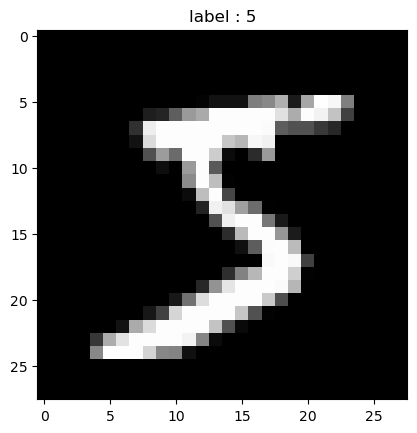

In [15]:
image, label = train_dataset[0]
pred = model(image.to(device))*100
print('pred: ',pred.argmax(1)[0].cpu().numpy(), 'label:',label)
print(pred)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

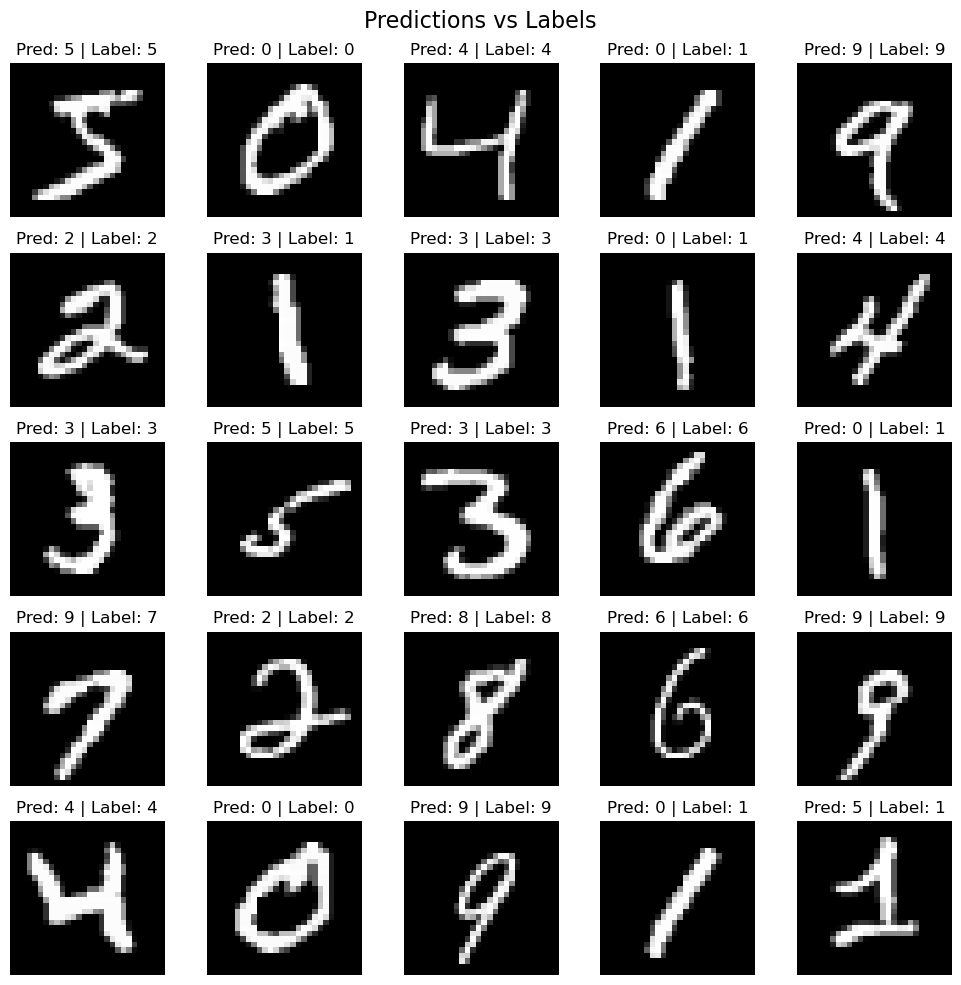

In [16]:
import torch
import matplotlib.pyplot as plt

# 1. 데이터셋에서 25개 샘플 가져오기
images, labels = zip(*[train_dataset[i] for i in range(25)])  # 첫 25개 샘플
images = torch.stack(images)  # 텐서로 변환
labels = torch.tensor(labels)  # 정답 레이블

# 2. 모델 예측
model.eval()
with torch.no_grad():
    preds = model(images.to(device))  # 모델 예측
    pred_labels = preds.argmax(1).cpu()  # 예측 클래스

# 3. 5x5 그리드로 이미지와 예측값 시각화
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('Predictions vs Labels', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')  # 이미지 표시
    ax.set_title(f'Pred: {pred_labels[i].item()} | Label: {labels[i].item()}')
    ax.axis('off')  # 축 숨기기

plt.tight_layout()
plt.show()


In [17]:
import torch
import torchvision
import sys

print("Python Version:", sys.version)
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Version:", torch.version.cuda)
    print("GPU Name:", torch.cuda.get_device_name(0))


Python Version: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
PyTorch Version: 2.5.1
Torchvision Version: 0.20.1
CUDA Available: True
CUDA Version: 12.4
GPU Name: NVIDIA GeForce RTX 4060 Ti
